In [1]:
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
##import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## Divide the dataset into imdependant and dependant features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
##Feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
##concamtenate the variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X=pd.concat([X,geography,gender],axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
#Splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [16]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [18]:
X_train.shape

(8000, 11)

In [19]:
X_test.shape

(2000, 11)

In [20]:
## Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [21]:
## Intialize ANN
classifier=Sequential()


In [22]:
#Add input layer
classifier.add(Dense(units=11,activation='relu'))

In [23]:
#add first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [24]:
##add second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [25]:
##add output layer
classifier.add(Dense(1,activation='sigmoid'))

In [26]:
##train the neural network
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
import tensorflow
opt=tensorflow.optimizers.Adam(learning_rate=0.01)

In [28]:
#early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [29]:
model_history=classifier.fit(X_train,y_train,validation_split=0.333,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
534/534 [==============================] - 12s 9ms/step - loss: 0.5005 - accuracy: 0.7957 - val_loss: 0.4443 - val_accuracy: 0.7950
Epoch 2/1000
534/534 [==============================] - 6s 10ms/step - loss: 0.4406 - accuracy: 0.7965 - val_loss: 0.4270 - val_accuracy: 0.7950
Epoch 3/1000
534/534 [==============================] - 4s 8ms/step - loss: 0.4258 - accuracy: 0.7965 - val_loss: 0.4188 - val_accuracy: 0.7950
Epoch 4/1000
534/534 [==============================] - 2s 4ms/step - loss: 0.4141 - accuracy: 0.7965 - val_loss: 0.4064 - val_accuracy: 0.7950
Epoch 5/1000
534/534 [==============================] - 2s 4ms/step - loss: 0.4021 - accuracy: 0.7965 - val_loss: 0.3988 - val_accuracy: 0.7950
Epoch 6/1000
534/534 [==============================] - 3s 6ms/step - loss: 0.3963 - accuracy: 0.8143 - val_loss: 0.3951 - val_accuracy: 0.8112
Epoch 7/1000
534/534 [==============================] - 2s 5ms/step - loss: 0.3896 - accuracy: 0.8268 - val_loss: 0.3905 - val_accurac

In [30]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

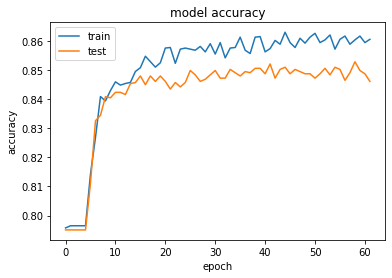

In [31]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

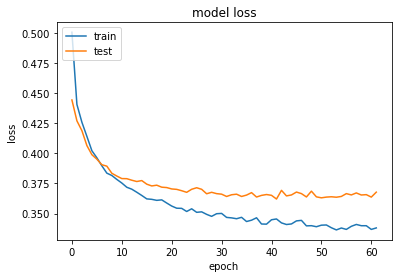

In [32]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
##evaulate the model

y_pred=classifier.predict(X_test)
y_pred=(y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [34]:
##confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
                    

array([[1494,  101],
       [ 190,  215]])

In [35]:
##calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [36]:
print("accuracy",score)

accuracy 0.8545


In [37]:
#get the weights
classifier.get_weights()

[array([[ 0.16095331,  0.14567691,  0.06516466, -0.05268211, -0.00802391,
         -0.5872206 ,  0.32566813, -0.18066509,  0.08303361, -0.33979258,
          0.05186512],
        [-0.66968375,  0.08626387,  0.3747622 , -0.6010546 ,  0.24312997,
         -0.41900903, -0.79614   , -0.07770414,  0.39159456,  0.6535939 ,
         -0.53563786],
        [-0.12285385,  0.21986799,  0.39474577,  0.19184245, -0.05075825,
          0.03515784, -0.07979314, -0.08989647,  0.12014582, -0.13993081,
         -0.07235003],
        [ 0.49932638, -0.11330045,  0.44967255, -0.19273636,  0.5262827 ,
          0.36782584, -0.29063588, -0.19686183,  0.08071458,  0.07631872,
          0.01045569],
        [-0.33552167,  0.08710186, -0.36675626, -0.22480553,  1.1749313 ,
         -0.3078362 , -0.20901734, -1.3583488 , -0.7249041 , -0.1939456 ,
         -0.07306614],
        [ 0.11687819, -0.06821115,  0.16212943, -0.22841989, -0.08218206,
         -0.10515173,  0.00508257, -0.07949116,  0.05652711,  0.0692556